In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Random seed for reproducibility
np.random.seed(17)


# Load the dataset
data_ksi = pd.read_csv('./data/Total_KSI.csv')

# Display all columns and rows (up to 100) for better visibility
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
    
# Data Overview
print("\n===================== DATA OVERVIEW =====================")
print("\nDisplaying First 3 Records:\n", data_ksi.head(3))
print("\nShape of the dataframe:", data_ksi.shape)
print("\nData Type of the dataframe:", type(data_ksi))


===================== DATA OVERVIEW =====================

Displaying First 3 Records:
    OBJECTID    INDEX    ACCNUM                  DATE  TIME       STREET1  \
0         1  3389067  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   
1         2  3389068  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   
2         3  3389069  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   

       STREET2 OFFSET      ROAD_CLASS               DISTRICT   LATITUDE  \
0  O CONNOR DR    NaN  Major Arterial  Toronto and East York  43.699595   
1  O CONNOR DR    NaN  Major Arterial  Toronto and East York  43.699595   
2  O CONNOR DR    NaN  Major Arterial  Toronto and East York  43.699595   

   LONGITUDE                ACCLOC    TRAFFCTL VISIBILITY LIGHT RDSFCOND  \
0 -79.318797  Intersection Related  No Control      Clear  Dark      Wet   
1 -79.318797  Intersection Related  No Control      Clear  Dark      Wet   
2 -79.318797  Intersection Related  No Control      Clear  Dark      Wet   



In [3]:
 # Data Description
print("\n===================== DATA DESCRIPTION =====================")
print("\nStatistical Summary:\n", data_ksi.describe())


===================== DATA DESCRIPTION =====================

Statistical Summary:
            OBJECTID         INDEX        ACCNUM          TIME      LATITUDE  \
count  18957.000000  1.895700e+04  1.402700e+04  18957.000000  18957.000000   
mean    9479.000000  3.994181e+07  5.576714e+08   1364.956428     43.710299   
std     5472.558862  3.749731e+07  1.180026e+09    631.310388      0.056294   
min        1.000000  3.363207e+06  2.530100e+04      0.000000     43.589678   
25%     4740.000000  5.408154e+06  1.034561e+06    924.000000     43.661727   
50%     9479.000000  7.820656e+06  1.220029e+06   1450.000000     43.702346   
75%    14218.000000  8.092292e+07  1.386958e+06   1852.000000     43.755945   
max    18957.000000  8.180752e+07  4.008024e+09   2359.000000     43.855445   

          LONGITUDE    FATAL_NO              x             y  
count  18957.000000  870.000000   18957.000000  1.895700e+04  
mean     -79.396490   28.752874  629181.568576  4.840951e+06  
std        0.1

In [4]:
print("\n===================== COLUMN INFORMATION =====================")
data_ksi.info()



===================== COLUMN INFORMATION =====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT 

In [5]:
# Missing Values
print("\n===================== MISSING VALUES =====================")
missing_data = data_ksi.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(data_ksi)) * 100
print(pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing']))



===================== MISSING VALUES =====================
                   Total Missing  Percent Missing
EMERG_VEH                  18908        99.741520
DISABILITY                 18464        97.399378
CYCCOND                    18157        95.779923
CYCACT                     18155        95.769373
CYCLISTYPE                 18152        95.753548
ALCOHOL                    18149        95.737722
FATAL_NO                   18087        95.410666
TRSN_CITY_VEH              17809        93.944189
TRUCK                      17788        93.833412
REDLIGHT                   17380        91.681173
MOTORCYCLE                 17273        91.116738
CYCLIST                    16971        89.523659
SPEEDING                   16263        85.788891
PEDACT                     15730        82.977264
PEDTYPE                    15728        82.966714
PEDCOND                    15711        82.877038
OFFSET                     15137        79.849132
PASSENGER                  11774        

In [6]:
# Unique Values for Each Column
print("\n===================== UNIQUE VALUES =====================")
for column in data_ksi.columns:
    print(f"\nUnique values in {column}:", data_ksi[column].unique())


===================== UNIQUE VALUES =====================

Unique values in OBJECTID: [    1     2     3 ... 18955 18956 18957]

Unique values in INDEX: [ 3389067  3389068  3389069 ... 81754166 81755104 81755105]

Unique values in ACCNUM: [8.93184000e+05 9.09646000e+05 8.84090000e+05 ... 3.00295735e+09
 3.00297103e+09 3.00297809e+09]

Unique values in DATE: ['1/1/2006 10:00:00 AM' '1/2/2006 10:00:00 AM' '1/4/2006 10:00:00 AM' ...
 '12/26/2023 10:00:00 AM' '12/28/2023 10:00:00 AM'
 '12/29/2023 10:00:00 AM']

Unique values in TIME: [ 236  315  705 ... 1839  346  411]

Unique values in STREET1: ['WOODBINE AVE' 'DANFORTH AVE' 'BATHURST ST' ... 'ANNDALE DR'
 'HAREWOOD AV' 'DONSIDE DR']

Unique values in STREET2: ['O CONNOR DR' 'WEST LYNN AVE' 'DUNDAS ST W' ... 'LAWRENCE AV WEST'
 'FISHER ST' 'MAYBOURNE AV']

Unique values in OFFSET: [nan '60 NORTH OF' '1 m West of' '234 m South ' '450 m West o'
 '7 m West of' '314 m  of' '192 m East o' '2 m North of' '100 m East o'
 '51 m South o' '43 m We

In [7]:
from Visualizer import scatter_plot, pie_chart, bar_chart, heatmap_correlation
from Visualizer import  heatmap_missing_values, hist_plot, pair_plot, spline_plot, cat_distribution

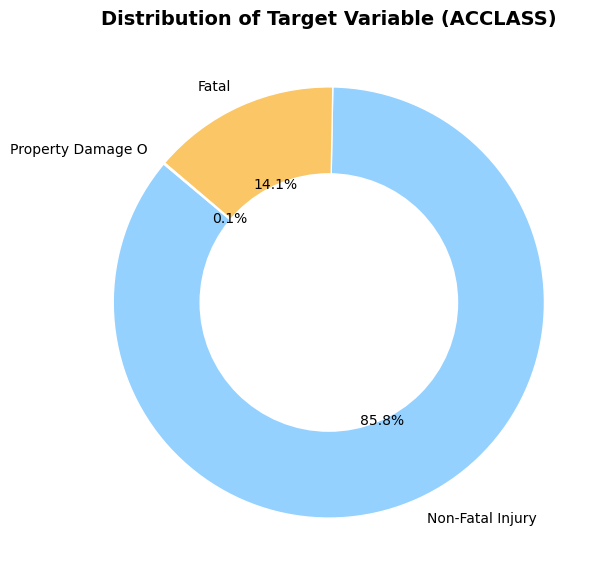

In [8]:
pie_chart(data_ksi,"./images/pie_chart.png")

C:\Users\Vivek K\OneDrive\Desktop\Sem2\AI\toronto-accident-prediction\SVM\Visualizer.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ROAD_CLASS", data=df, palette=custom_bar_colors)


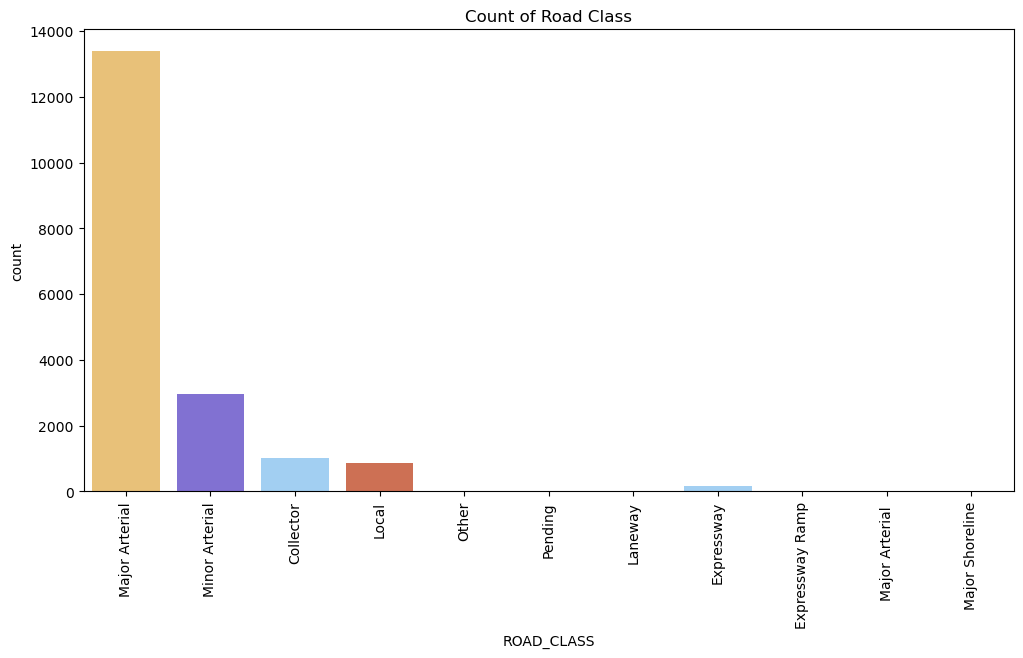

In [9]:
bar_chart(data_ksi,"./images/bar_chart.png")

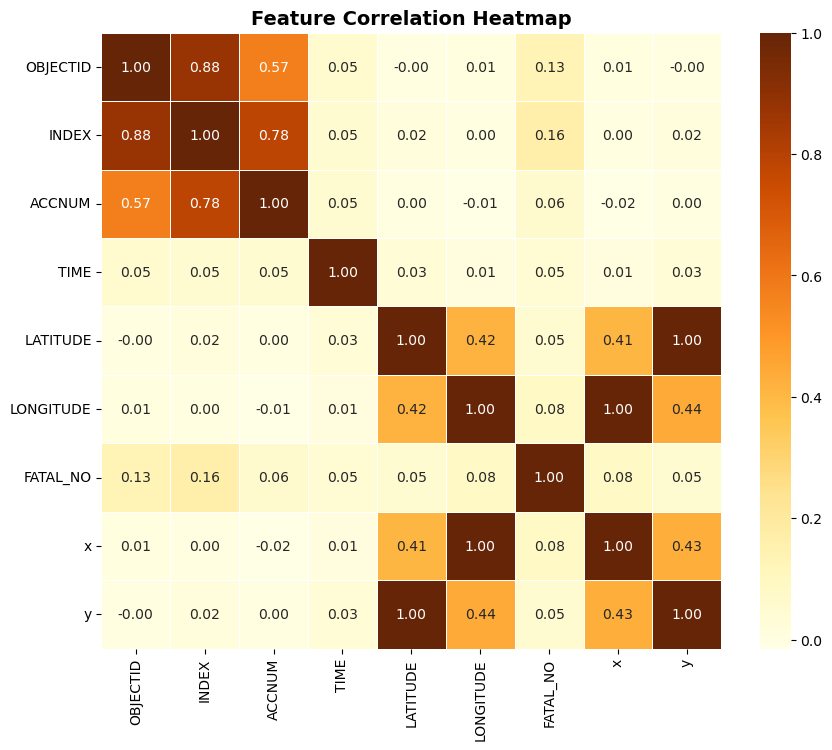

In [10]:
heatmap_correlation(data_ksi,"./images/heatmap_correlation.png")

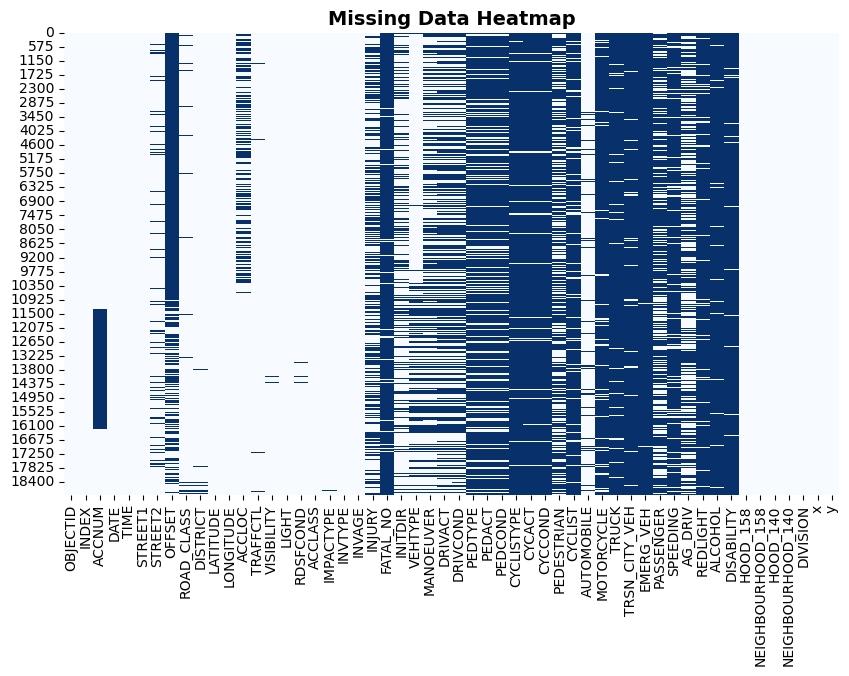

In [11]:
heatmap_missing_values(data_ksi,"./images/heatmap_missing_values.png")

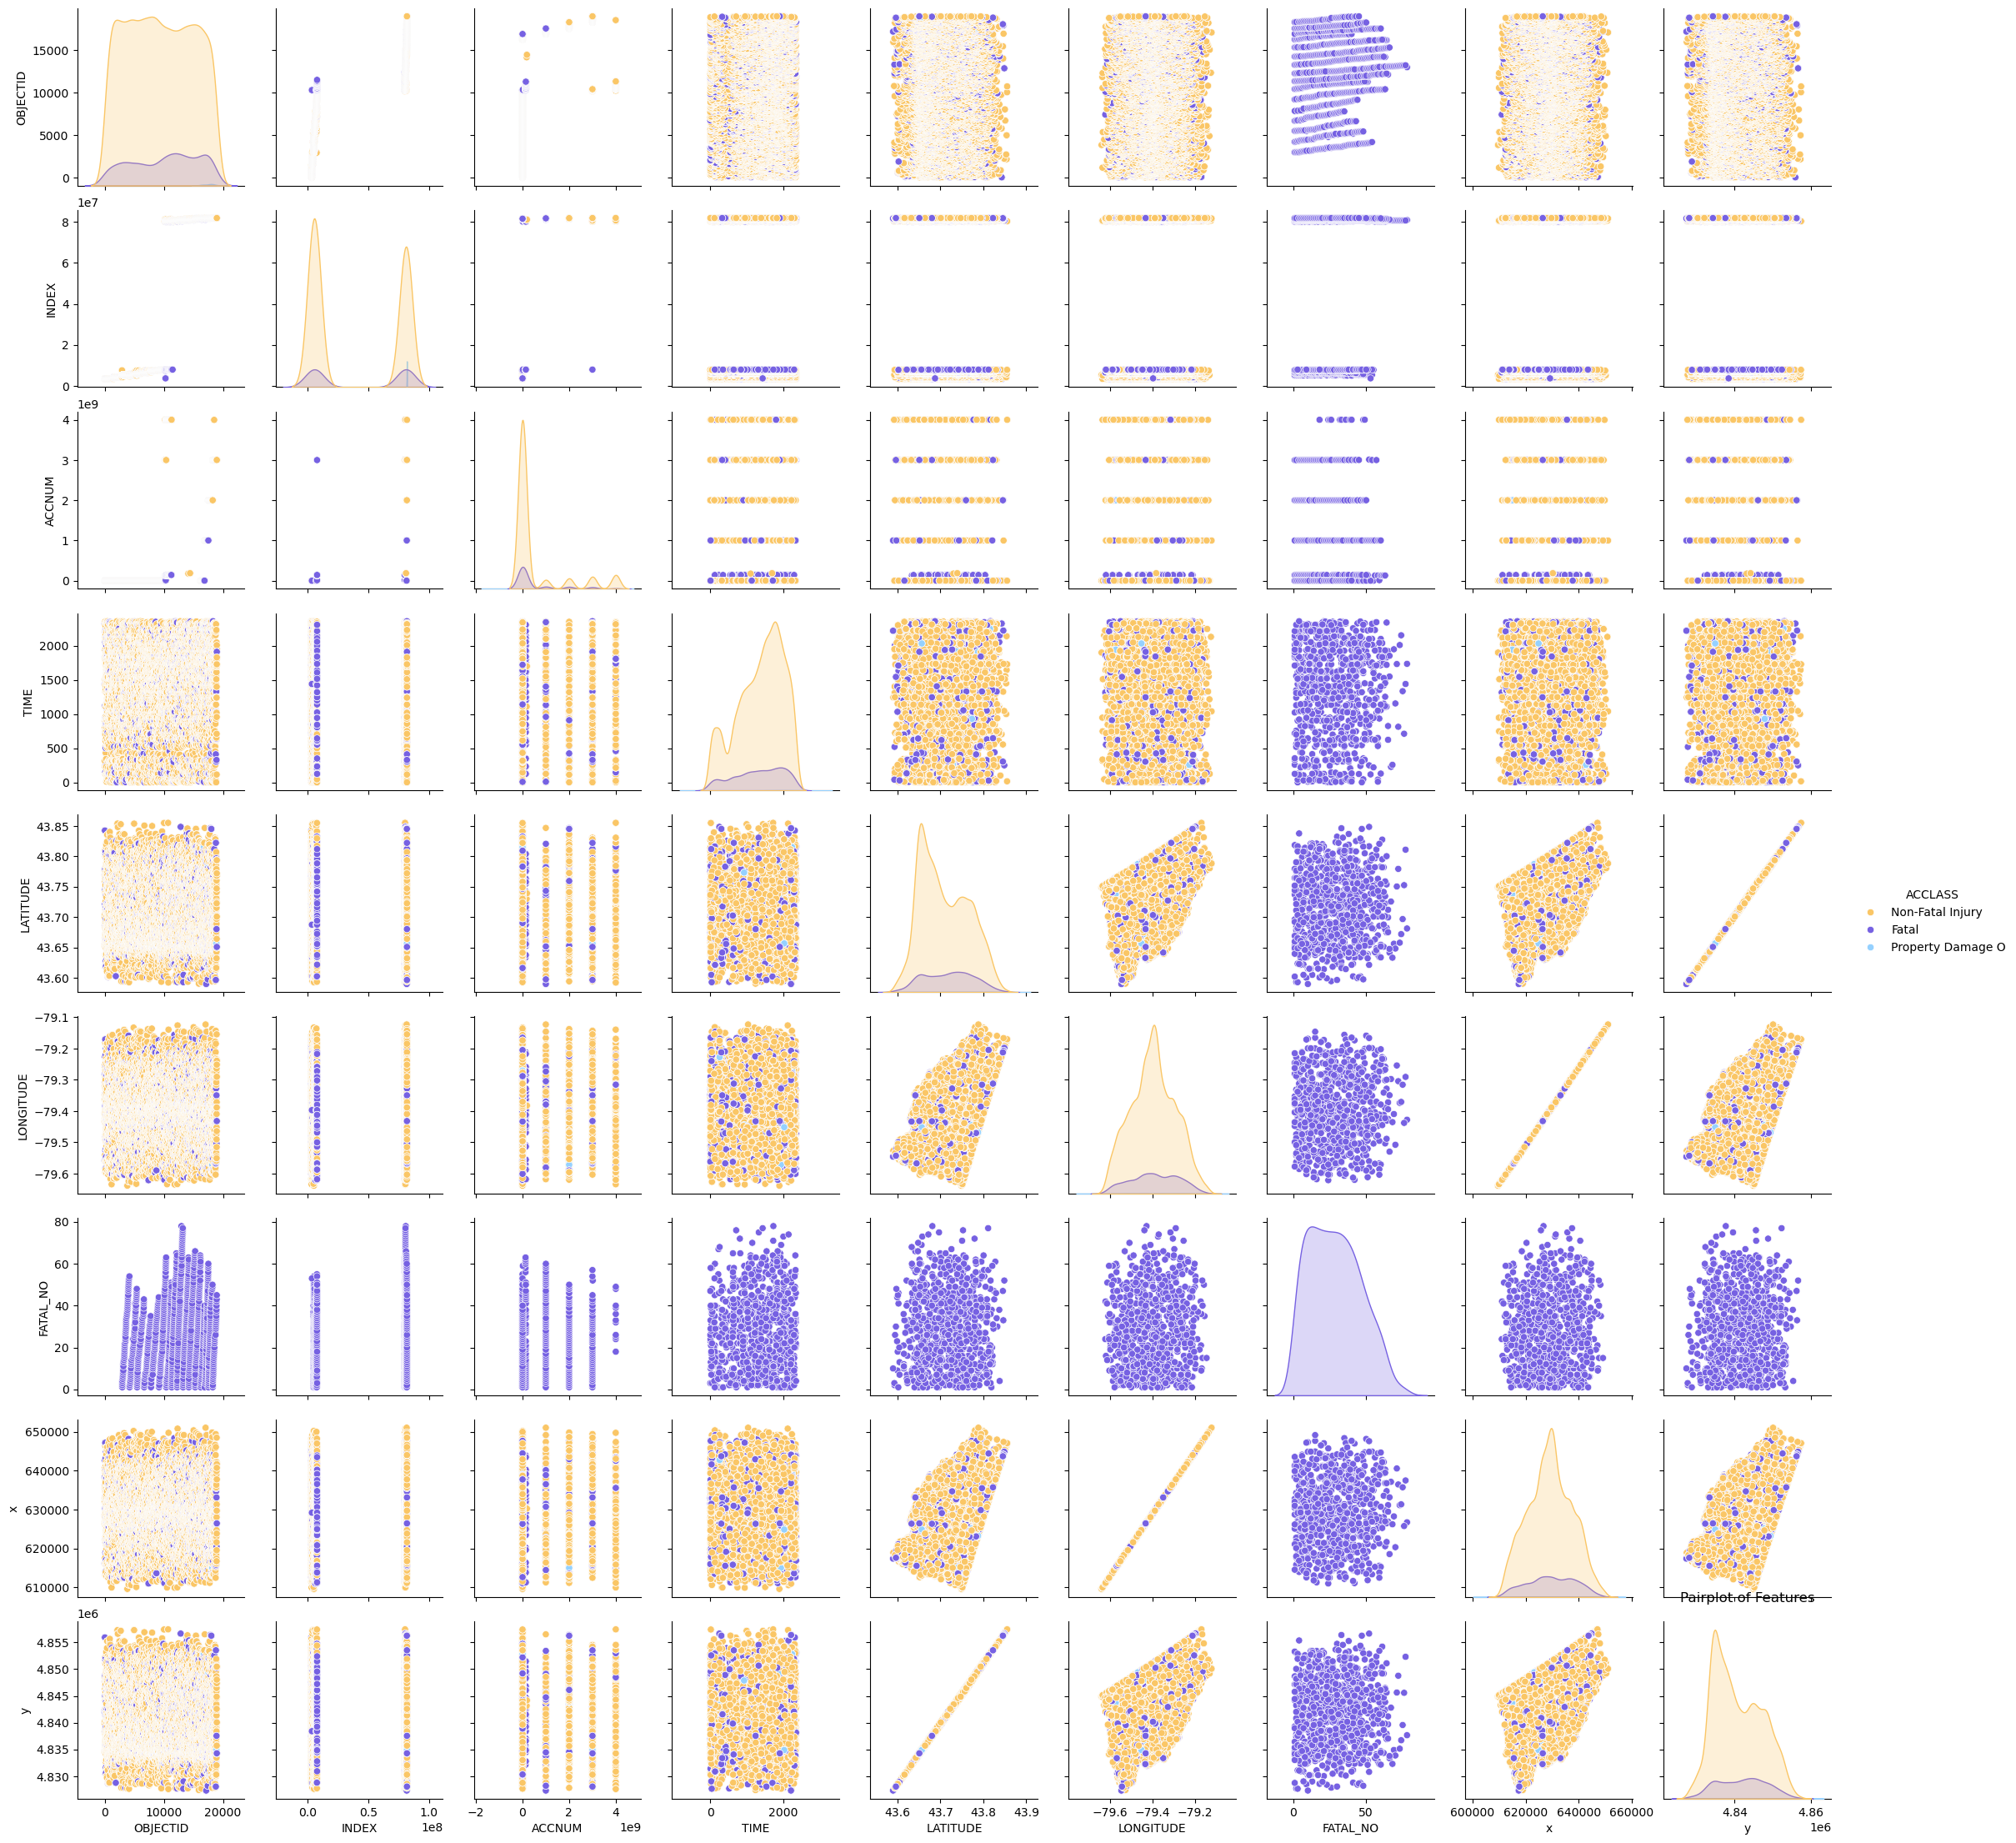

In [12]:
pair_plot(data_ksi,"./images/pair_plot.png")

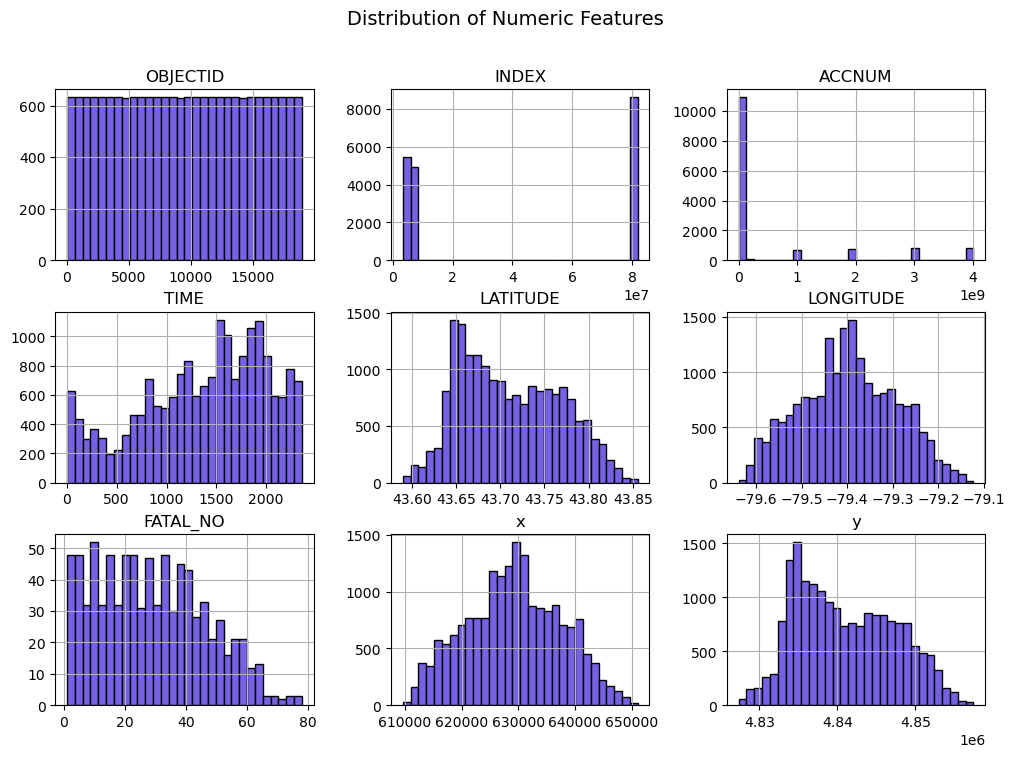

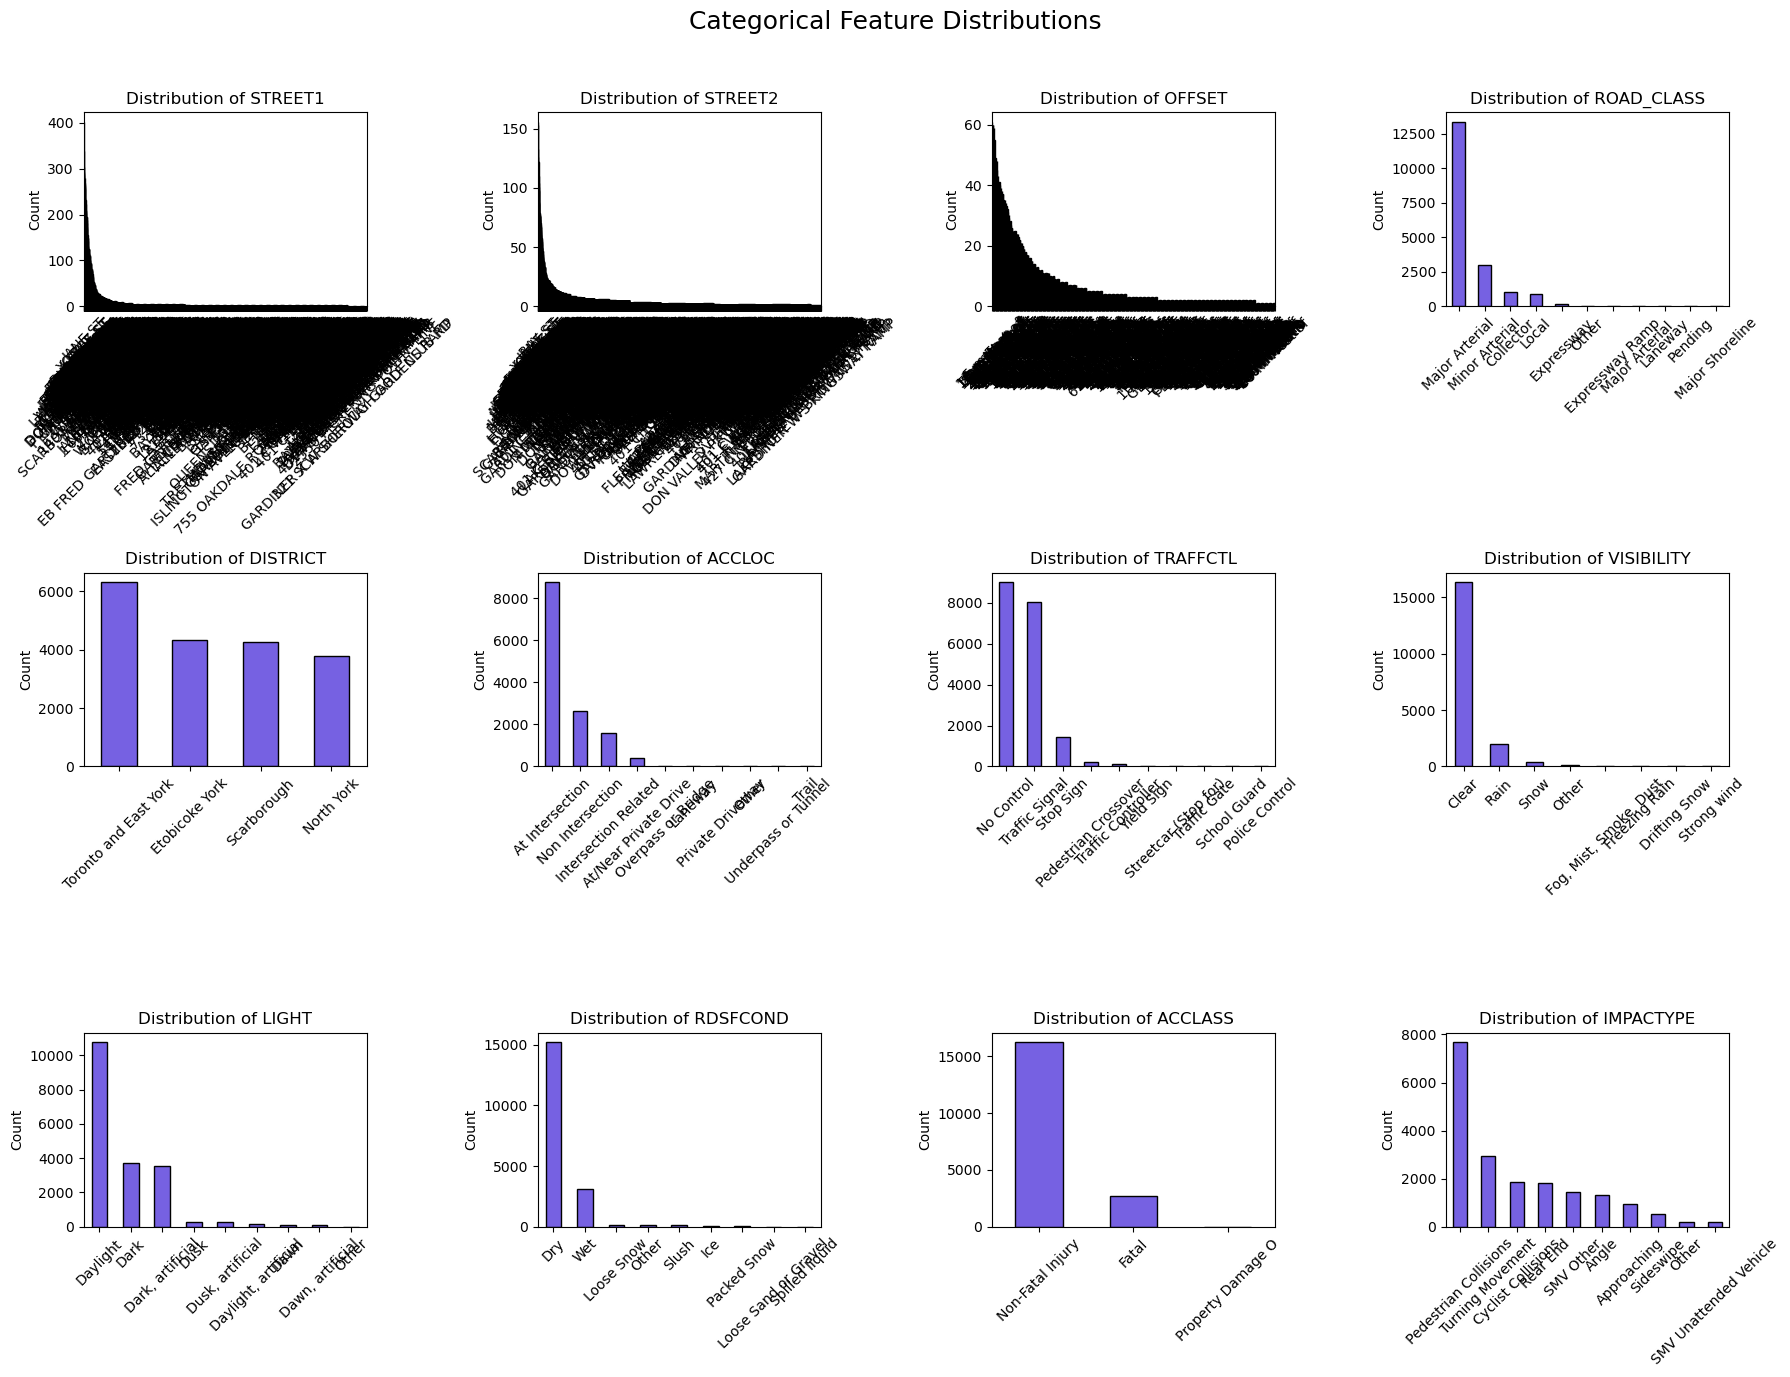

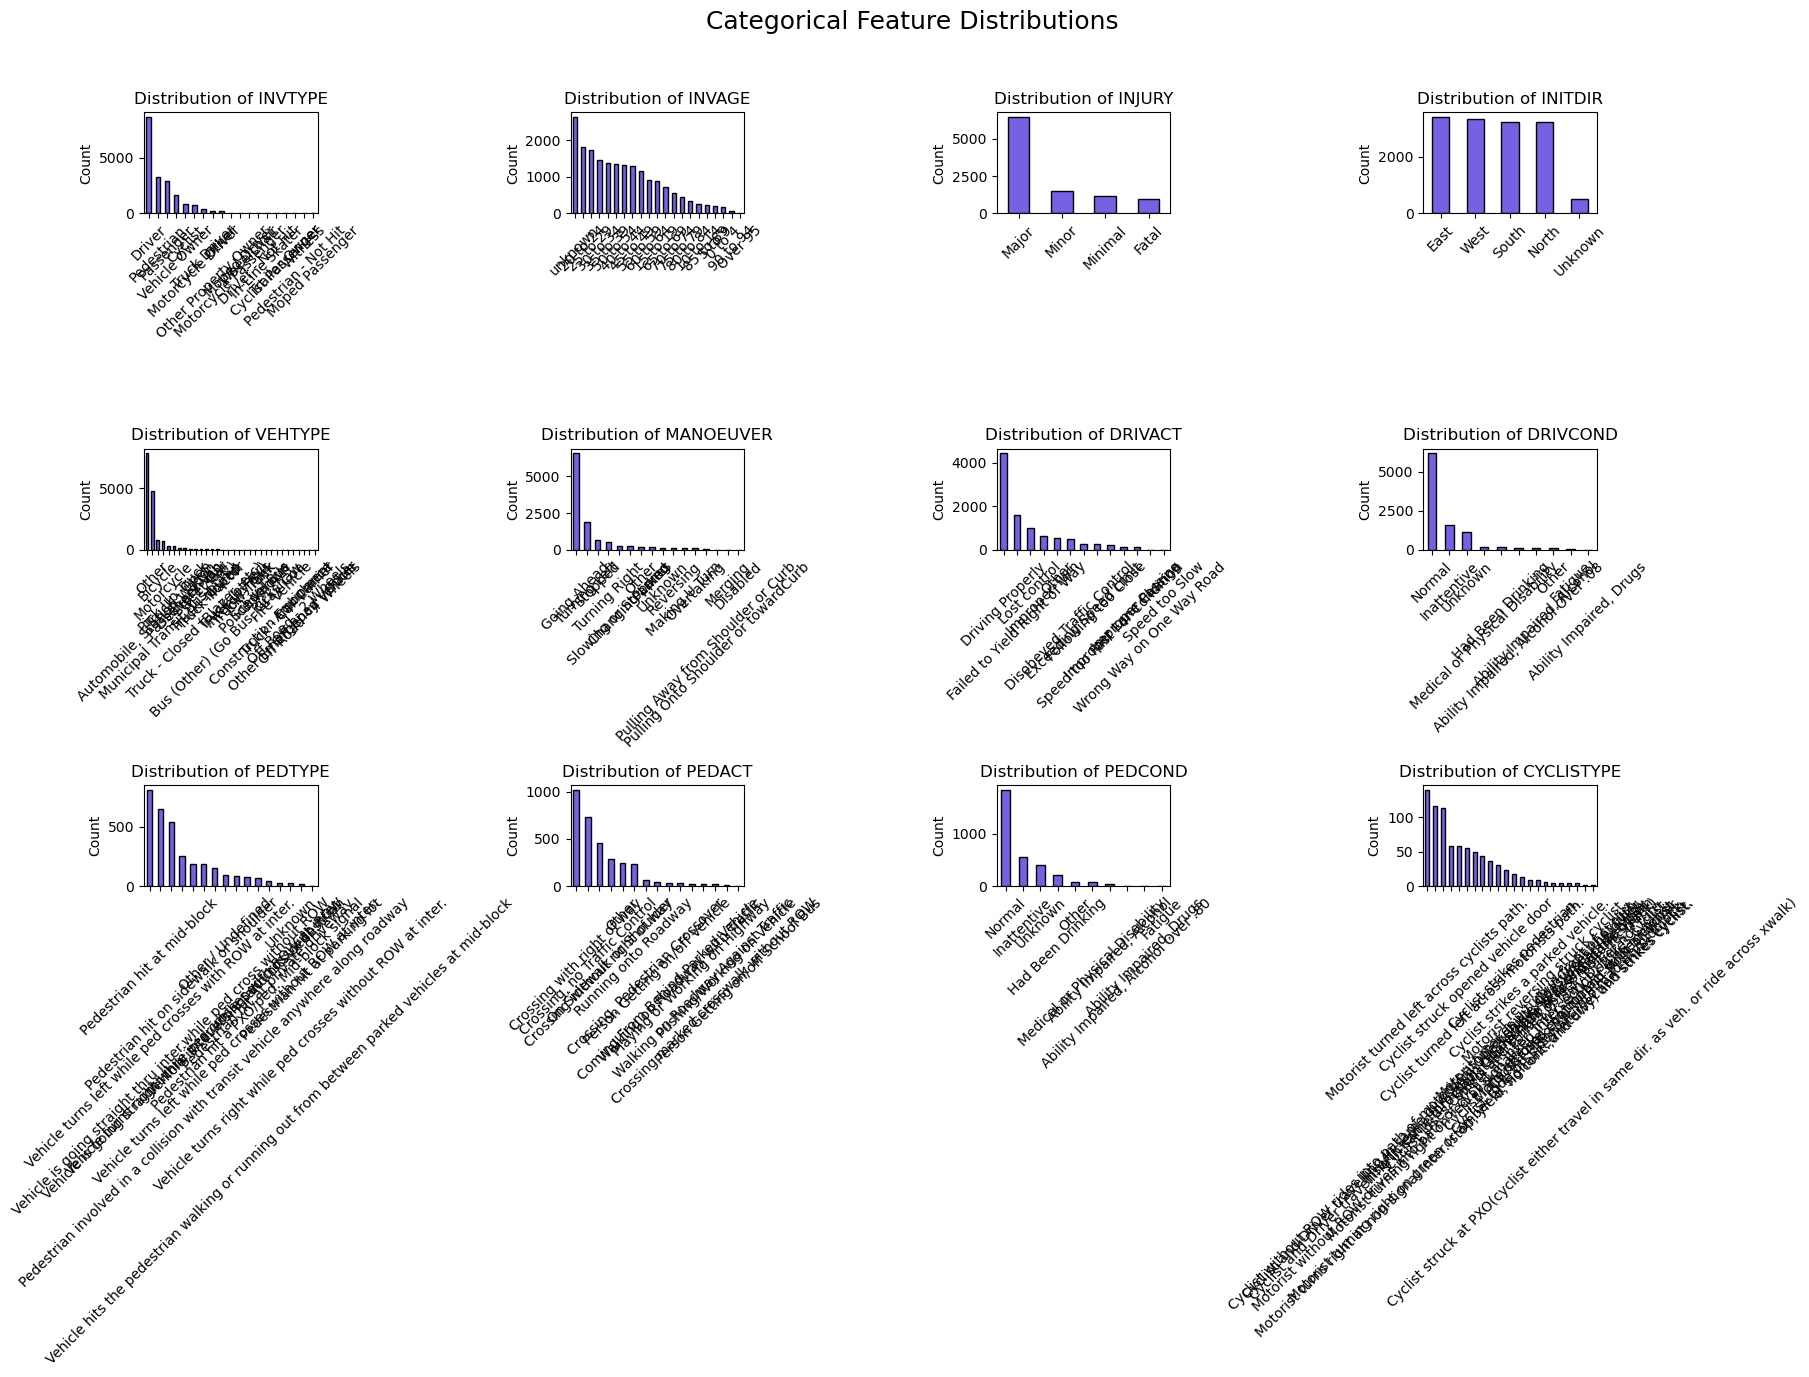

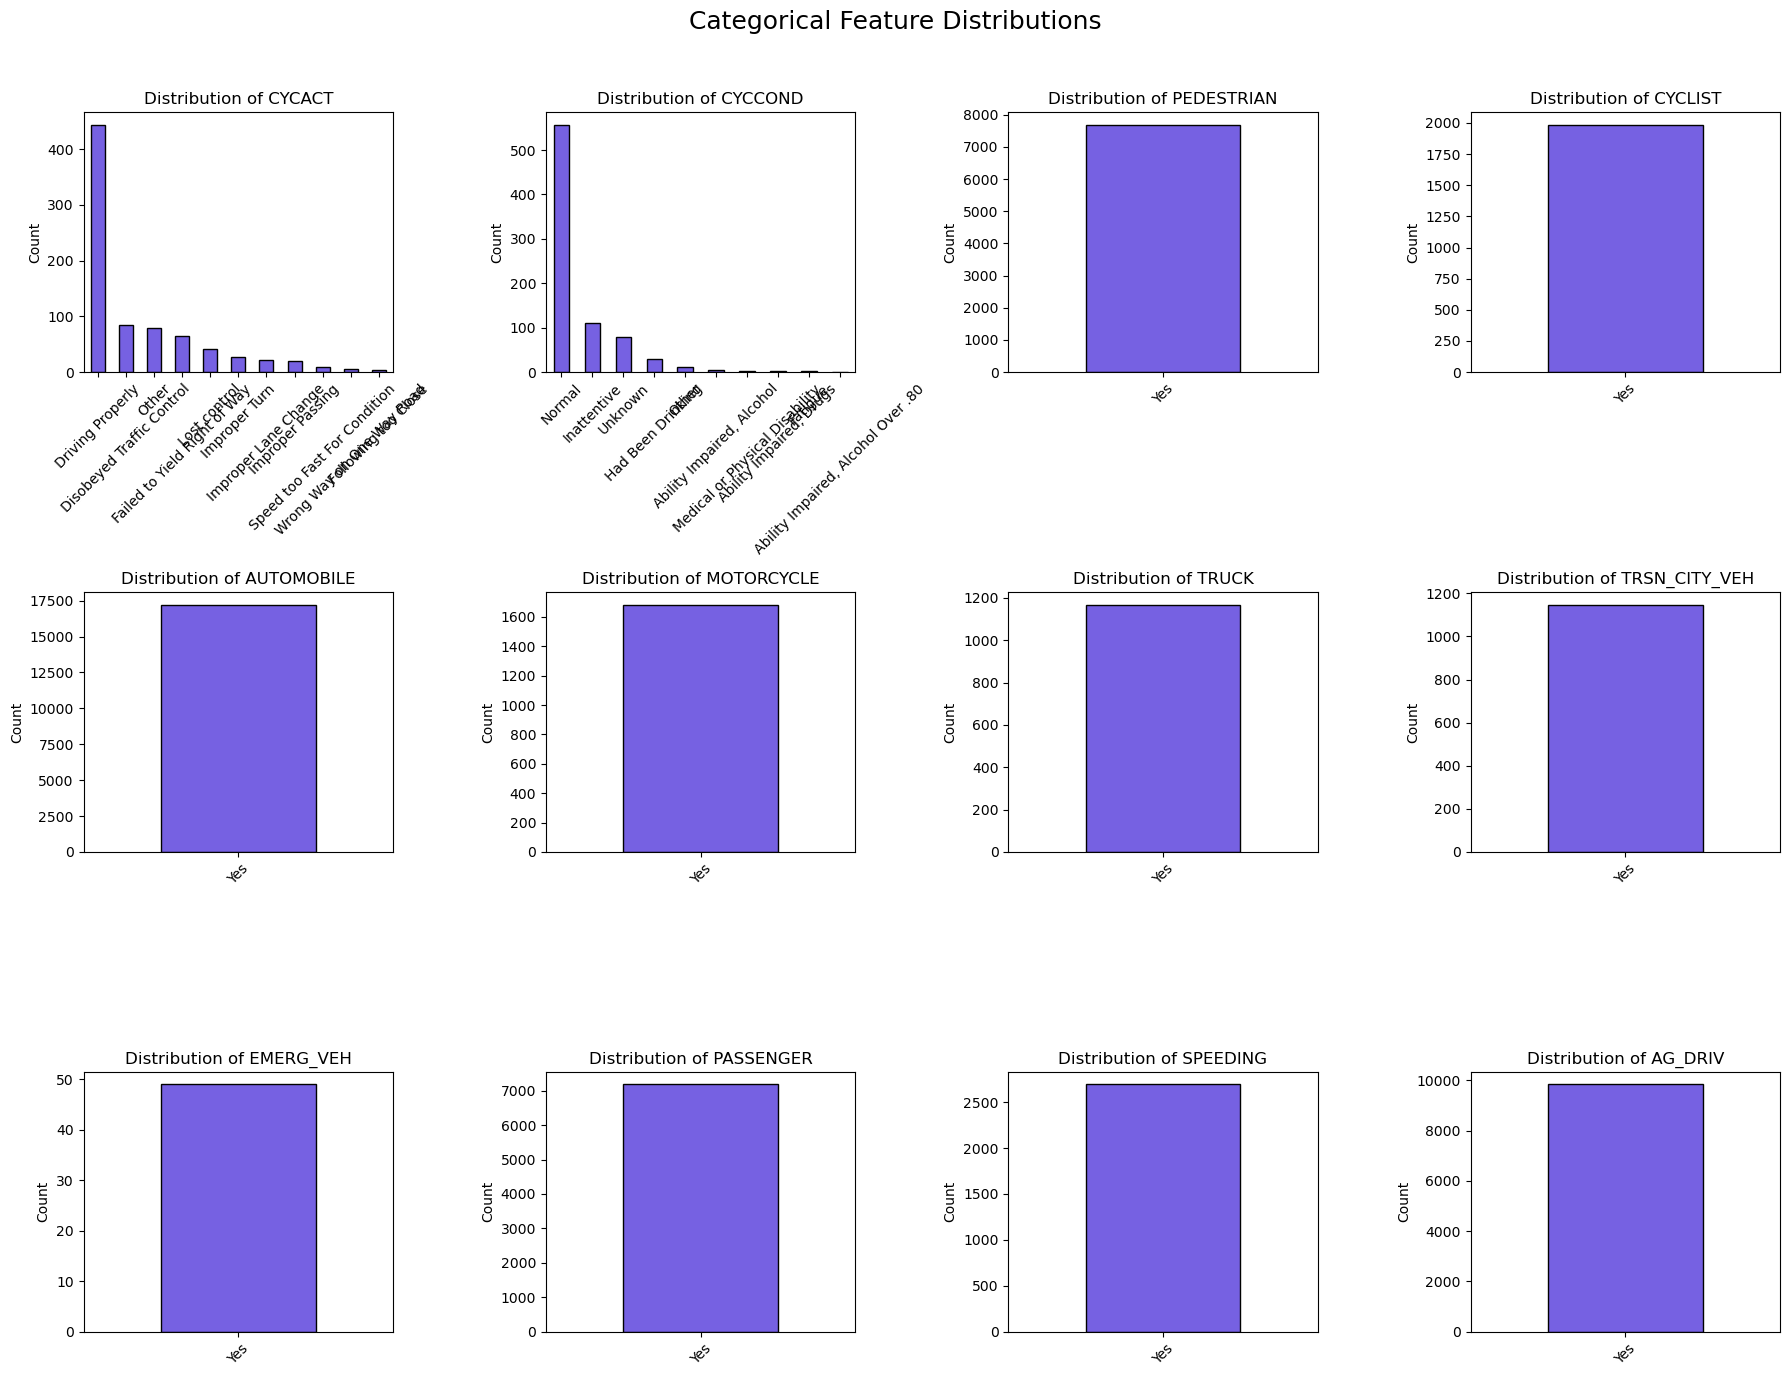

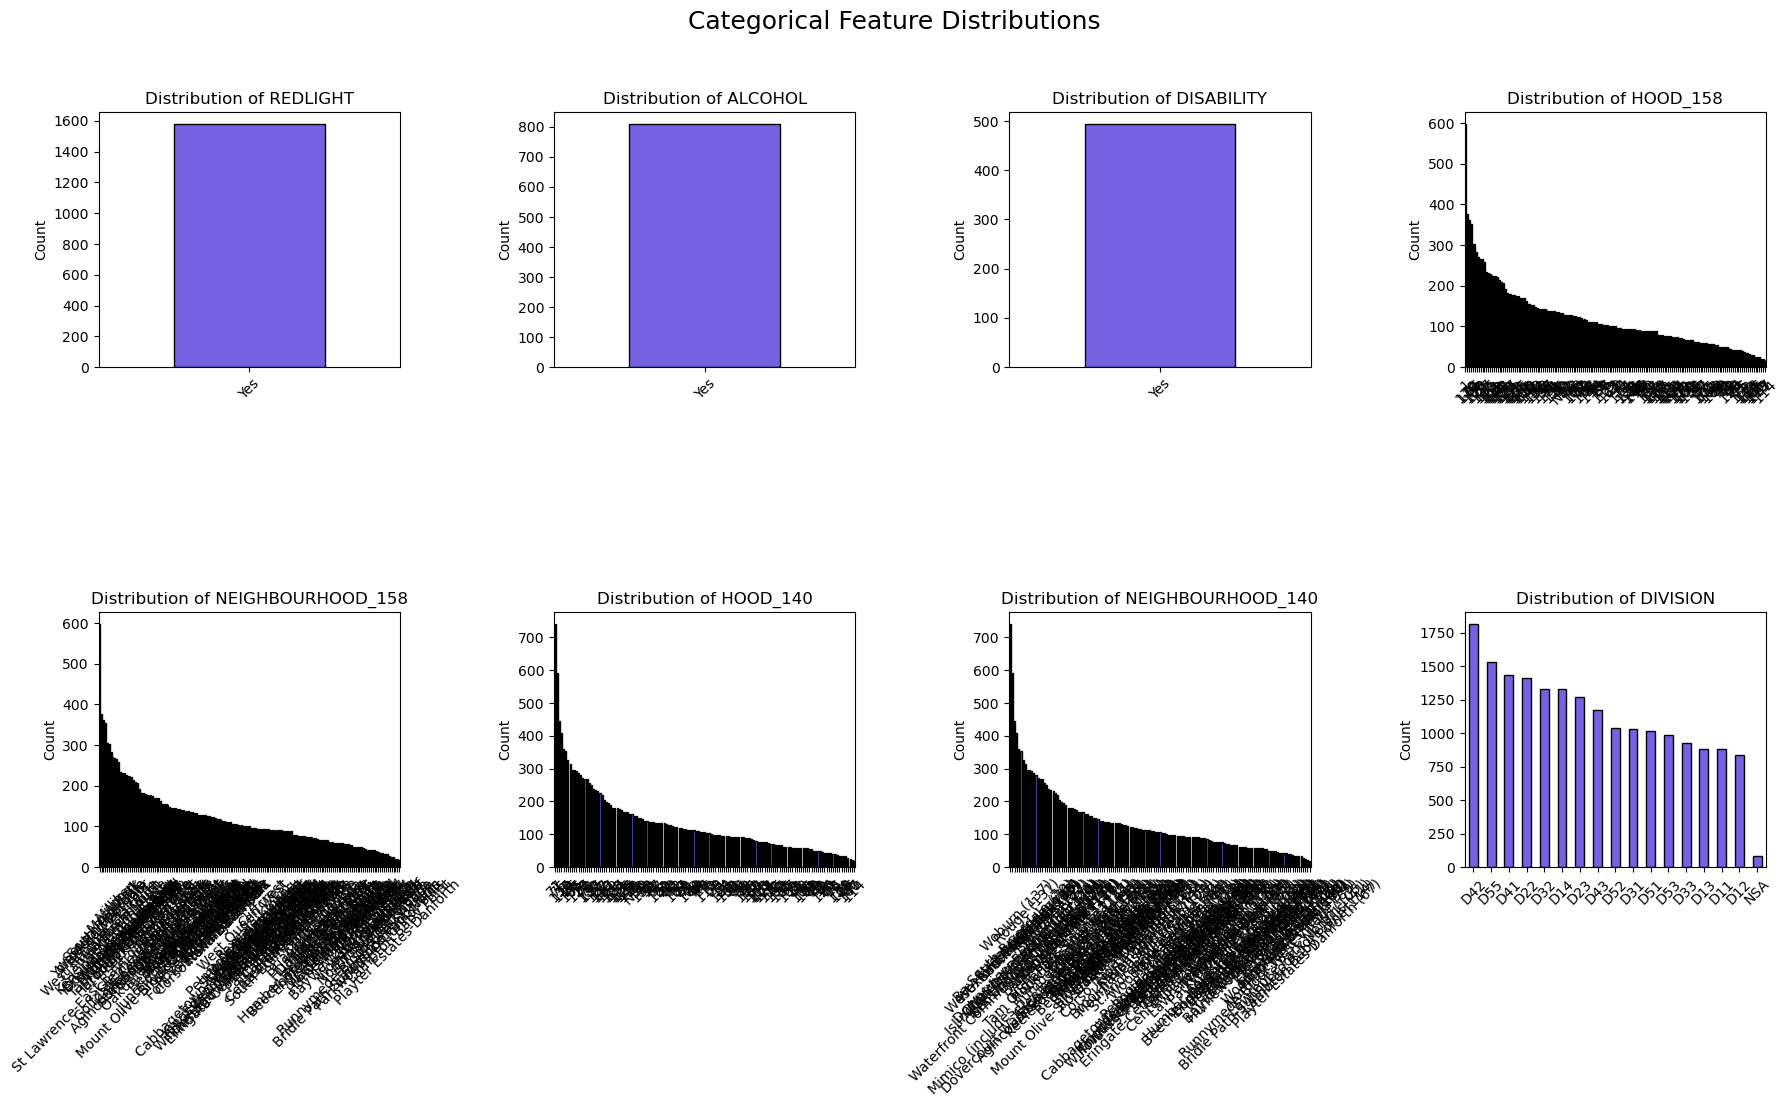

In [13]:
hist_plot(data_ksi,"./images/hist_plot.png")
cat_distribution(data_ksi,"./images/cat_distribution.png")

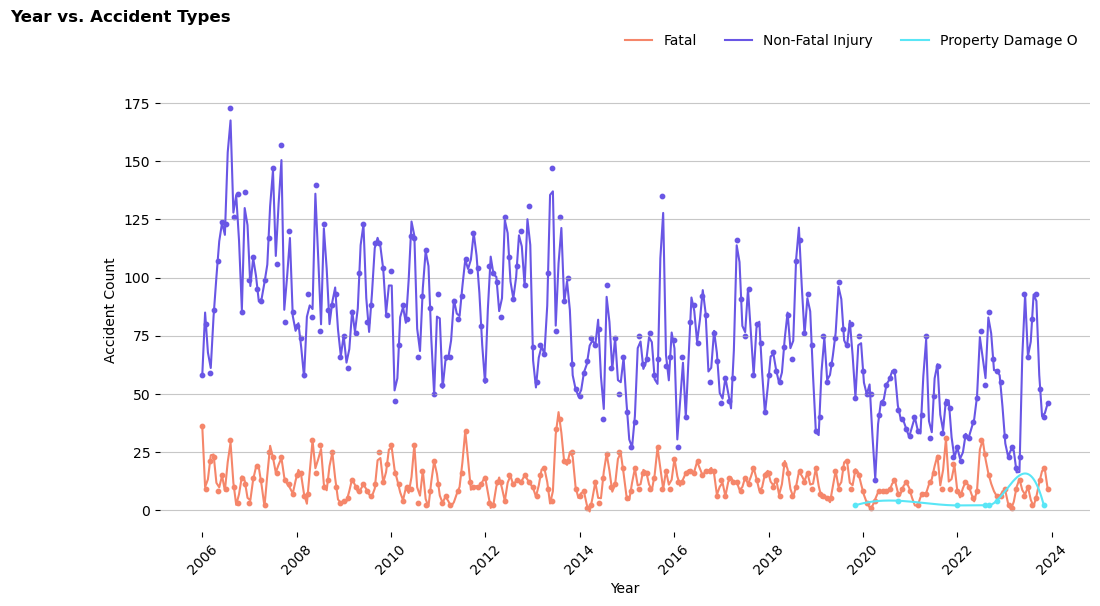

In [14]:
spline_plot(data_ksi,"./images/spline_plot.png")

In [15]:
# Drop unnecessary columns
data_ksi.drop(columns=['INDEX','OBJECTID','HOOD_158','HOOD_140','OFFSET', 'STREET1', 'STREET2','NEIGHBOURHOOD_158','NEIGHBOURHOOD_140'], inplace=True)

# Columns to drop
columns_to_drop = ['FATAL_NO', 'DISTRICT', 'DIVISION','x','y','INJURY','INVTYPE','INVAGE','INITDIR','VEHTYPE',
                           'MANOEUVER','DRIVACT','PEDTYPE','PEDACT','CYCLISTYPE','CYCACT','CYCCOND','PEDCOND','DRIVCOND']

In [16]:
data_ksi.drop(columns=columns_to_drop, inplace=True)

# drop rows with missing target values
data_ksi = data_ksi.dropna(subset=["ACCLASS"])


In [17]:
def aggregate_rows(group):
    # If all rows are identical, keep the first row
    if group.nunique().eq(1).all():
        return group.iloc[0]
    else:
        # Otherwise, aggregate numerical columns with mean, categorical with mode
        aggregated = group.agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean() if x.dtype != 'O' else None)
        return aggregated

In [18]:
# aggregate rows with same ACCNUM, DATE, TIME, LATITUDE, LONGITUDE
data_ksi = data_ksi.groupby(['ACCNUM'], as_index=False, group_keys=False).apply(aggregate_rows).reset_index(drop=True)
data_ksi = data_ksi.groupby(['DATE', 'TIME', 'LATITUDE', 'LONGITUDE'], as_index=False).apply(aggregate_rows).reset_index(drop=True)

C:\Users\Vivek K\AppData\Local\Temp\ipykernel_46276\424187613.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_ksi = data_ksi.groupby(['ACCNUM'], as_index=False, group_keys=False).apply(aggregate_rows).reset_index(drop=True)
C:\Users\Vivek K\AppData\Local\Temp\ipykernel_46276\424187613.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_ksi = data_ksi.groupby(['DATE', 'TIME', 'LATITUDE', 'LONGI

In [19]:
data_ksi.drop(columns=['ACCNUM'], inplace=True)

# drop rows with property damage only
data_ksi.drop(data_ksi[data_ksi['ACCLASS'] == 'Property Damage O'].index, inplace=True)

# drop duplicate rows
data_ksi.drop_duplicates(inplace=True)

In [20]:
# date trunc remove time
data_ksi["DATE"] = pd.to_datetime(data_ksi["DATE"])
data_ksi['DATE'] = data_ksi["DATE"].dt.to_period("D").astype(str)

# update time to per hour
data_ksi['TIME'] = pd.to_datetime(data_ksi['TIME'], format='%H%M', errors='coerce').dt.hour

data_ksi['ROAD_CLASS'] = data_ksi['ROAD_CLASS'].str.replace(r'MAJOR ARTERIAL ', 'MAJOR ARTERIAL', regex=False)

# unknown_columns = [ 'PEDCOND', 'CYCCOND', 'DRIVCOND'] - dropping for now
other_columns = ['ROAD_CLASS', 'ACCLOC', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE']
boolean_columns = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']

data_ksi[other_columns] = data_ksi[other_columns].fillna("Other")
#data_ksi[unknown_columns] = data_ksi[unknown_columns].fillna("Unknown")
data_ksi[boolean_columns] = data_ksi[boolean_columns].fillna("No")

data_ksi["TRAFFCTL"] = data_ksi["TRAFFCTL"].fillna("No_Control")


In [21]:
from imblearn.over_sampling import RandomOverSampler

# Applying RandomOverSampler to data_ksi
rus = RandomOverSampler(sampling_strategy='auto', random_state=17)
X_res, y_res = rus.fit_resample(data_ksi.drop(columns=['ACCLASS']), data_ksi['ACCLASS'])

# Combine resampled features and labels into a single DataFrame
data_ksi = pd.concat([X_res, y_res], axis=1)

# Shuffle the data
data_ksi = data_ksi.sample(frac=1, random_state=17).reset_index(drop=True)

In [22]:
# Print results
print("\n===================== DATA CLEANING DONE =====================")
print("\nShape of the dataframe after cleaning:", data_ksi.shape)
print("Count of each class:", data_ksi['ACCLASS'].value_counts())


===================== DATA CLEANING DONE =====================

Shape of the dataframe after cleaning: (8644, 25)
Count of each class: ACCLASS
Fatal               4322
Non-Fatal Injury    4322
Name: count, dtype: int64


In [23]:
class_1_data = data_ksi[data_ksi['ACCLASS'] == 'Fatal']
class_2_data = data_ksi[data_ksi['ACCLASS'] == 'Non-Fatal Injury']

features = data_ksi.drop(columns=["ACCLASS"])
target = data_ksi["ACCLASS"]

# Check if there are enough records in both classes
if len(class_1_data) >= 5 and len(class_2_data) >= 5:
    # Sample from both classes
    sample_class_1 = class_1_data.sample(n=5, random_state=17)
    sample_class_2 = class_2_data.sample(n=5, random_state=17)

    # Concatenate samples and shuffle
    final_sample = pd.concat([sample_class_1, sample_class_2]).sample(frac=1, random_state=17).reset_index(drop=True)

    # Set final_sample to be the unseen features and labels
    unseen_features = final_sample.drop(columns=["ACCLASS"])
    unseen_labels = final_sample["ACCLASS"]

    # Remove sampled rows from the original dataset
    data_ksi = data_ksi.drop(final_sample.index)

    # Update features and target after removal
    features = data_ksi.drop(columns=["ACCLASS"])
    target = data_ksi["ACCLASS"]

In [24]:
# Encode the target variable 
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [25]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=17)

In [26]:
# Identifying numerical and categorical features
num_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = features.select_dtypes(include=['object']).columns.tolist()

# Displaying feature info
print("\n===================== FEATURES INFO =====================")
print("\nFeatures Info:\n")
features.info()

print("\n===================== NUMERICAL & CATEGORICAL FEATURES =====================")
print("\nNumerical features:", num_features)
print("\nCategorical features:", cat_features)


===================== FEATURES INFO =====================

Features Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8634 entries, 10 to 8643
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           8634 non-null   object 
 1   TIME           8556 non-null   float64
 2   ROAD_CLASS     8634 non-null   object 
 3   LATITUDE       8634 non-null   float64
 4   LONGITUDE      8634 non-null   float64
 5   ACCLOC         8634 non-null   object 
 6   TRAFFCTL       8634 non-null   object 
 7   VISIBILITY     8634 non-null   object 
 8   LIGHT          8634 non-null   object 
 9   RDSFCOND       8634 non-null   object 
 10  IMPACTYPE      8634 non-null   object 
 11  PEDESTRIAN     8634 non-null   object 
 12  CYCLIST        8634 non-null   object 
 13  AUTOMOBILE     8634 non-null   object 
 14  MOTORCYCLE     8634 non-null   object 
 15  TRUCK          8634 non-null   object 
 16  TRSN_CITY_VEH  8634

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Numerical transformation pipeline
num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), 
        ('scaler', StandardScaler())])

# Categorical transformation pipeline
cat_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  
        ('encoder', OneHotEncoder(handle_unknown="ignore"))])

# Combining transformations using ColumnTransformer
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Defining the pipeline with SVM classifier
pipe_svm_ksi = Pipeline([
        ('preprocessor', preprocessor),
        ('svm', SVC(random_state=17))])

In [28]:
# SVM hyperparameter grid 
param_grid_svm = [
        {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100]},  # linear kernel    
        {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100], 'svm__gamma': [0.3, 1.0, 3.0]},  # rbf kernel rank#1 C=100, gamma=3.0
        {'svm__kernel': ['poly'], 'svm__C': [10], 'svm__gamma': [1.0], 'svm__degree': [3]}  # poly kernel 
    ]

In [29]:
 # Performing Grid Search with cross-validation
grid_search = GridSearchCV(estimator=pipe_svm_ksi, param_grid=param_grid_svm, scoring='accuracy', n_jobs=1, refit=True, verbose=3)


In [30]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END ......svm__C=1, svm__kernel=linear;, score=0.923 total time=   3.3s
[CV 2/5] END ......svm__C=1, svm__kernel=linear;, score=0.925 total time=   3.4s
[CV 3/5] END ......svm__C=1, svm__kernel=linear;, score=0.913 total time=   3.3s
[CV 4/5] END ......svm__C=1, svm__kernel=linear;, score=0.922 total time=   3.4s
[CV 5/5] END ......svm__C=1, svm__kernel=linear;, score=0.907 total time=   3.8s
[CV 1/5] END .....svm__C=10, svm__kernel=linear;, score=0.900 total time=   3.5s
[CV 2/5] END .....svm__C=10, svm__kernel=linear;, score=0.896 total time=   4.8s
[CV 3/5] END .....svm__C=10, svm__kernel=linear;, score=0.896 total time=   3.4s
[CV 4/5] END .....svm__C=10, svm__kernel=linear;, score=0.907 total time=   3.2s
[CV 5/5] END .....svm__C=10, svm__kernel=linear;, score=0.901 total time=   2.9s
[CV 1/5] END ....svm__C=100, svm__kernel=linear;, score=0.893 total time=  13.4s
[CV 2/5] END ....svm__C=100, svm__kernel=linear;

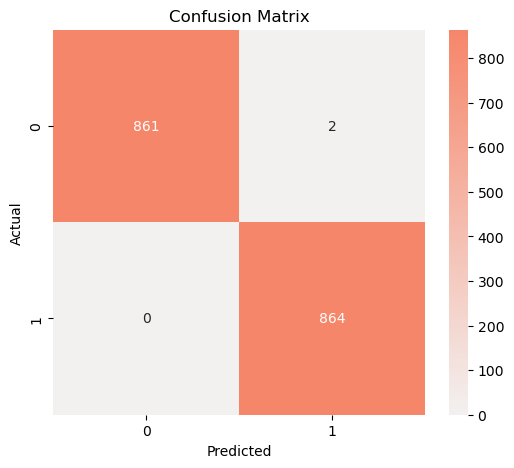


===================== CLASSIFICATION REPORT =====================

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1727
   macro avg       1.00      1.00      1.00      1727
weighted avg       1.00      1.00      1.00      1727


===================== PRECISION, RECALL, F1-SCORE =====================

Precision: 0.998844596952892
Recall: 0.9988419224088014
F1-Score: 0.9988419200790717
ROC-AUC Score: 0.9988412514484356


In [31]:
from ModelPerformance import ModelPerformance
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Predict using the best model
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

modelPerformance = ModelPerformance(best_model, X_test, y_test)
modelPerformance.conf_matrix("./images/confusion_matrix.png")

# Print classification report for detailed performance metrics
print("\n===================== CLASSIFICATION REPORT =====================")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

#Precison, Recall, F1-Score
print("\n===================== PRECISION, RECALL, F1-SCORE =====================")
print("\nPrecision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred, average='weighted'))

In [32]:
print("\n===================== BEST MODEL METRICS =====================")
print("\nBest Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best Training Accuracy:", grid_search.best_score_)

accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


===================== BEST MODEL METRICS =====================

Best Parameters: {'svm__C': 1, 'svm__gamma': 3.0, 'svm__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TIME', 'LATITUDE',
                                                   'LONGITUDE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                               

In [33]:
 # Handling unseen data
label_map = {'Fatal': 0, 'Non-Fatal Injury': 1}
unseen_labels_numeric = unseen_labels.map(label_map)

# Fit the model on unseen data and make predictions
best_model.fit(unseen_features, unseen_labels_numeric)
unseen_predictions = best_model.predict(unseen_features)
unseen_accuracy = best_model.score(unseen_features, unseen_labels_numeric)

print("\n===================== UNSEEN DATA METRICS =====================")
print("\nUnseen Predictions:", unseen_predictions)
for i in range(len(unseen_features)):
    print(f"Predicted: {unseen_predictions[i]} Actual: {unseen_labels_numeric.iloc[i]}")

print(f"Unseen Data Accuracy: {unseen_accuracy:.4f}")


===================== UNSEEN DATA METRICS =====================

Unseen Predictions: [1 0 1 0 0 0 1 1 1 0]
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Unseen Data Accuracy: 1.0000


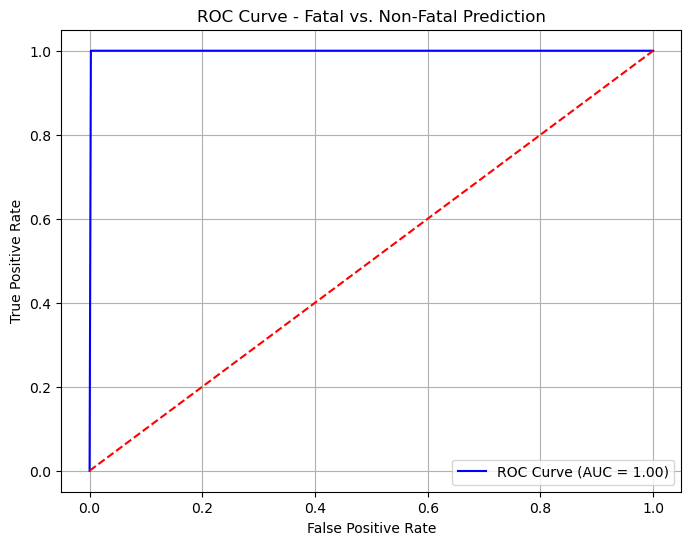

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred):.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve - Fatal vs. Non-Fatal Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
